# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Akif Rachmat Hidayah - 1301213512

<b>Url presentasi</b>
https://youtu.be/pXRmRJzFglU

Fungsi yang dikerjakan

$$[1 + (x_1 + x_2 + 1)^2 \cdot (19 - 14x_1 + 3x_1^2 - 14x_2 + 6x_1x_2 + 3x_2^2)] * [30 + (2x_1 - 3x_2)^2 \cdot (18 - 32x_1 + 12x_1^2 + 48x_2 - 36x_1x_2 + 27x_2^2)]$$

Range yang digunakan: [-2, 2]

Algoritma yang digunakan
- Grey Wolf Optimizer (GWO)
- Ant Colony Optimization (ACO)



In [218]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter,FuncAnimation
from IPython.display import Image

In [219]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)
def f18(x1, x2):
    term1 = 1 + (x1 + x2 + 1)**2 * (19 - 14*x1 + 3*x1**2 - 14*x2 + 6*x1*x2 + 3*x2**2)
    term2 = 30 + (2*x1 - 3*x2)**2 * (18 - 32*x1 + 12*x1**2 + 48*x2 - 36*x1*x2 + 27*x2**2)

    F18 = term1 * term2
    return F18


# Example usage
result = f18(1, 2)  
print(result)


137150


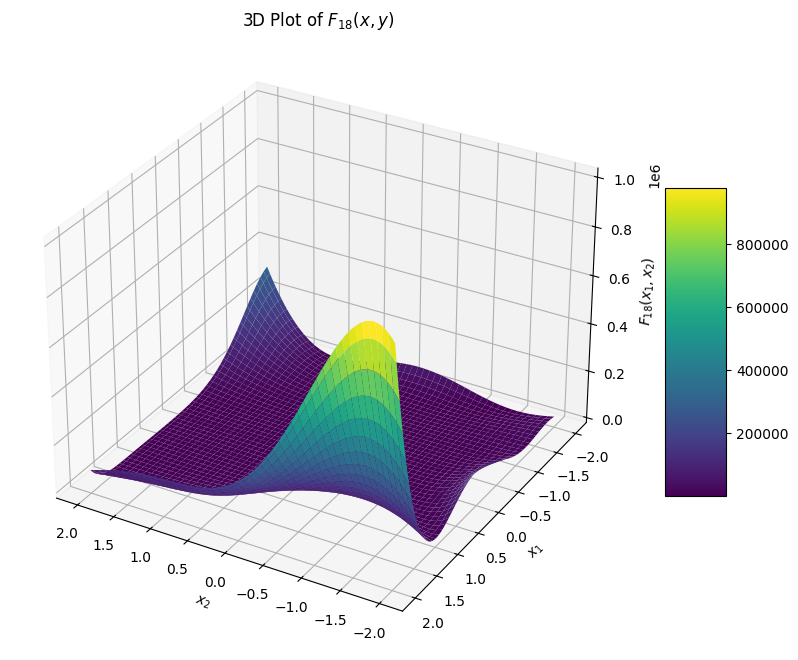

In [234]:
# Create a range of x1 and x2 values (unchanged)
# Function to plot the 3D graph
def plot_3d():
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f18(X,Y)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    ax.set_title('3D Plot of $F_{18}(x, y)$')
    ax.set_xlabel('$x_2$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$F_{18}(x_1, x_2)$')
    
    # Set the viewing angle to match the image
    ax.view_init(elev=30, azim=120)
    
    plt.show()

plot_3d()

#### Latar Belakang algoritma 1
GWO (Grey wolf optimizer)

Algoritma Grey Wolf Optimizer (GWO) adalah algoritma optimasi metaheuristik yang terinspirasi oleh perilaku berburu dan hierarki sosial serigala abu-abu. Algoritma ini meniru cara serigala melacak, mengepung, dan menyerang mangsanya.

**Hierarki Sosial**:

1. Alpha (α): Pemimpin kelompok, membuat keputusan tentang berburu, tidur, dan aktivitas lainnya.<br>
2. Beta (β): Bawahan alpha, membantu pengambilan keputusan dan memberikan umpan balik kepada alpha.<br>
3. Delta (δ): Bawahan alpha dan beta, bertanggung jawab atas pengawasan, menjaga disiplin, dan memberikan peringatan.<br>
4. Omega (ω): Serigala terendah dalam hierarki, berperan sebagai pengikut.<br>


**Tahapan Berburu:**

1. Melacak dan Mendekati Mangsa: Serigala mencari dan mendekati lokasi mangsa.<br>
2. Mengepung Mangsa: Alpha, beta, dan delta memimpin dalam mengepung mangsa.<br>
3. Menyerang Mangsa: Ketika mangsa berhenti bergerak, serigala menyerang.<br>


**Implementasi Algoritma:**

1. Inisialisasi: Populasi serigala (solusi kandidat) diinisialisasi secara acak dalam ruang pencarian.<br>
2. Evaluasi Fitness: Setiap solusi dievaluasi menggunakan fungsi tujuan.<br>
3. Identifikasi Pemimpin: Tiga solusi terbaik diidentifikasi sebagai alpha, beta, dan delta.<br>
4. Perbarui Posisi: Posisi setiap serigala diperbarui berdasarkan posisi alpha, beta, dan delta.<br>
5. Iterasi: Langkah 2-4 diulang hingga kriteria berhenti terpenuhi.<br>

**Keunggulan GWO:**

1. Sederhana dan mudah diimplementasikan.<br>
2. Tidak memerlukan informasi gradien.<br>
3. Keseimbangan yang baik antara eksplorasi dan eksploitasi.<br>
4. Efektif untuk berbagai masalah optimasi, termasuk fungsi unimodal dan multimodal.<br>


**Keterbatasan GWO:**

1. Dapat terjebak dalam optimum lokal untuk masalah yang sangat kompleks.<br>
2. Parameternya perlu disetel dengan hati-hati untuk kinerja optimal.<br>


Secara keseluruhan, GWO adalah algoritma optimasi yang kuat dan serbaguna dengan berbagai aplikasi di bidang teknik, ilmu komputer, dan lainnya.

In [221]:
#Algortima 1

# Initialize Wolves
def initialize_wolves(search_space, num_wolves):
    dim = len(search_space) 
    positions = np.zeros((num_wolves, dim))
    for i in range(dim):
        positions[:, i] = np.random.uniform(search_space[i][0], search_space[i][1], num_wolves) 
    return positions

# Calculate Fitness
def calculate_fitness(func, positions):
    return np.array([func(*wolf) for wolf in positions])

# Update Wolf Positions
def update_positions(positions, alpha_wolf, beta_wolf, delta_wolf, a, search_space):
    dim = len(search_space)
    num_wolves = len(positions)
    for i in range(num_wolves):
        r1 = np.random.rand(dim)
        r2 = np.random.rand(dim)

        A_alpha = 2 * a * r1 - a
        C_alpha = 2 * r2
        D_alpha = np.abs(C_alpha * alpha_wolf - positions[i])
        X1 = alpha_wolf - A_alpha * D_alpha

        A_beta = 2 * a * r1 - a
        C_beta = 2 * r2
        D_beta = np.abs(C_beta * beta_wolf - positions[i])
        X2 = beta_wolf - A_beta * D_beta

        A_delta = 2 * a * r1 - a
        C_delta = 2 * r2
        D_delta = np.abs(C_delta * delta_wolf - positions[i])
        X3 = delta_wolf - A_delta * D_delta

        positions[i] = (X1 + X2 + X3) / 3

        # Enforce boundaries
        for j in range(dim):
            positions[i, j] = np.clip(positions[i, j], search_space[j][0], search_space[j][1])
    return positions

# Main GWO Function
def gwo(func, search_space, num_wolves, max_iter, a_start, a_end):
    positions = initialize_wolves(search_space, num_wolves)

    for i in range(max_iter):
        fitness = calculate_fitness(func, positions)
        order = np.argsort(fitness)
        alpha_wolf = positions[order[0]]
        beta_wolf = positions[order[1]]
        delta_wolf = positions[order[2]]

        a = a_start - (a_start - a_end) * (i / max_iter)
        positions = update_positions(positions, alpha_wolf, beta_wolf, delta_wolf, a, search_space)

        print(f"Iteration {i + 1}: Best Fitness = {fitness[order[0]]}, Alpha Wolf = {alpha_wolf}")
    # Return best solution
    best_index = np.argmin(fitness)
    return positions[best_index], fitness[best_index]


#### Latar Belakang algoritma 2
Silahkan double click cell ini dan tulis latar belakang algoritma 2!

Ant Colony Optimization (ACO) 

Ant Colony Optimization (ACO) adalah algoritma optimasi yang terinspirasi oleh perilaku semut dalam menemukan jalur terpendek antara sarang dan sumber makanan.

**Konsep Utama:**

1. Feromon: Semut meninggalkan jejak feromon saat berjalan. Semakin banyak semut yang melewati suatu jalur, semakin kuat jejak feromon di jalur tersebut. <br>
2. Probabilitas: Semut memilih jalur berdasarkan probabilitas, yang dipengaruhi oleh intensitas feromon dan informasi heuristik (jika ada). Jalur dengan feromon lebih banyak cenderung dipilih.<br>
3. Penguapan Feromon: Jejak feromon menguap seiring waktu, sehingga mencegah konvergensi ke solusi yang kurang optimal.<br>

**Cara Kerja:**

1. Inisialisasi: Jejak feromon pada semua jalur diinisialisasi dengan nilai yang kecil.<br>
2. Konstruksi Solusi: Setiap semut membangun solusi (misalnya, jalur dari sarang ke makanan) dengan memilih langkah berikutnya berdasarkan probabilitas yang dipengaruhi oleh feromon dan heuristik.<br>
3. Evaluasi Solusi: Setiap solusi dievaluasi (misalnya, panjang jalur).<br>
4. Pembaruan Feromon: Jejak feromon diperbarui. Jalur yang termasuk dalam solusi yang lebih baik akan mendapatkan lebih banyak feromon.<br>
5. Penguapan Feromon: Semua jejak feromon berkurang secara proporsional.<br>
6. Iterasi: Langkah 2-5 diulang hingga kriteria berhenti terpenuhi.<br>

**Keunggulan ACO:**

1. Adaptif: Dapat beradaptasi dengan perubahan dinamis dalam masalah.<br>
2. Kolaboratif: Semut bekerja sama secara tidak langsung melalui jejak feromon.<br>
3. Paralel: Dapat diimplementasikan secara paralel untuk meningkatkan efisiensi.<br>
4. Efektif: Telah berhasil diterapkan pada berbagai masalah optimasi, seperti masalah komputasi, penjadwalan, dan perutean jaringan.<br>

**Keterbatasan ACO:**

1. Parameter Sensitif: Performanya sangat bergantung pada pemilihan parameter yang tepat.<br>
2. Konvergensi Lambat: Mungkin membutuhkan waktu yang lama untuk menemukan solusi optimal pada masalah yang kompleks.<br>


Secara keseluruhan, ACO adalah algoritma yang kuat dan fleksibel yang meniru kecerdasan kolektif semut untuk memecahkan masalah optimasi yang menantang.

In [222]:
# Algoritma 2

# Fungsi heuristik
def heuristic(x1, x2):
    return 1 / (f18(x1, x2) + 1e-10)  # Menghindari pembagian dengan nol

# Inisialisasi posisi semut
def initialize_ants(num_ants, bounds):
    x1_min, x1_max = bounds[0]
    x2_min, x2_max = bounds[1]
    return np.random.uniform([x1_min, x2_min], [x1_max, x2_max], (num_ants, 2))

# Pembaruan feromon
def update_pheromone(pheromone, all_paths, all_fitnesses, rho, Q, bounds):
    x1_min, x1_max = bounds[0]
    x2_min, x2_max = bounds[1]
    pheromone *= (1 - rho)
    for path, fitness in zip(all_paths, all_fitnesses):
        for i in range(len(path)-1):
            x1, x2 = path[i]
            idx1 = int((x1 - x1_min) / (x1_max - x1_min) * 100)
            idx2 = int((x2 - x2_min) / (x2_max - x2_min) * 100)
            pheromone[idx1, idx2] += Q / fitness

# Pemilihan langkah berdasarkan probabilitas
def select_next_step(pheromone, heuristic, current_position, alpha, beta, bounds):
    x1, x2 = current_position
    x1_min, x1_max = bounds[0]
    x2_min, x2_max = bounds[1]
    idx1 = int((x1 - x1_min) / (x1_max - x1_min) * 100)
    idx2 = int((x2 - x2_min) / (x2_max - x2_min) * 100)
    probs = (pheromone[idx1, :]**alpha) * (heuristic(x1, np.linspace(x2_min, x2_max, 100))**beta)
    probs /= np.sum(probs)
    next_idx2 = np.random.choice(range(100), p=probs)
    next_x2 = x2_min + next_idx2 / 100 * (x2_max - x2_min)
    return (x1, next_x2)

# Algoritma utama ACO
def aco(num_ants, num_iterations, alpha, beta, rho, Q, bounds):
    pheromone_init = 1.0
    pheromone = np.ones((100, 100)) * pheromone_init
    best_solution = None
    best_fitness = float('inf')
    best_path = None
    
    all_iterations_paths = []
    
    for iteration in range(num_iterations):
        all_paths = []
        all_fitnesses = []
        
        for ant in range(num_ants):
            path = []
            current_position = initialize_ants(1, bounds)[0]
            path.append(current_position)
            
            for step in range(100):
                next_position = select_next_step(pheromone, heuristic, current_position, alpha, beta, bounds)
                path.append(next_position)
                current_position = next_position
                
            fitness = f18(current_position[0], current_position[1])
            all_paths.append(path)
            all_fitnesses.append(fitness)
            
            if fitness < best_fitness:
                best_solution = current_position
                best_fitness = fitness
                best_path = path
        
        update_pheromone(pheromone, all_paths, all_fitnesses, rho, Q, bounds)
        all_iterations_paths.append(all_paths)
        
        print(f"Iteration {iteration+1}/{num_iterations}, Best Fitness: {best_fitness}")
    
    return best_solution, best_fitness, best_path, all_iterations_paths

#### Running algortima 1
Penjelasan Parameter:
*   search_space = [(-2, 2), (-2, 2)]: Ini mendefinisikan rentang nilai yang valid untuk setiap dimensi solusi. Dalam hal ini, baik x1 dan x2 dibatasi antara -2 dan 2.
*   num_wolves = 30: Ini adalah ukuran populasi serigala (solusi kandidat) dalam algoritma. Semakin banyak serigala, semakin besar kemungkinan menemukan solusi yang baik, tetapi juga meningkatkan waktu komputasi. Nilai 30 adalah pilihan umum yang memberikan keseimbangan yang baik.
*   max_iter = 100: Ini adalah jumlah maksimum iterasi (generasi) yang akan dijalankan oleh algoritma. Lebih banyak iterasi memberikan lebih banyak waktu bagi algoritma untuk menyempurnakan solusi, tetapi juga membutuhkan waktu lebih lama.
*   a_start = 2.0 dan a_end = 0.0: Ini adalah nilai awal dan akhir untuk koefisien konvergensi a.  a dimulai dari 2.0 (menekankan eksplorasi) dan secara bertahap berkurang menjadi 0.0 (menekankan eksploitasi) seiring berjalannya iterasi.

In [223]:
# Parameter selection
search_space = [(-2, 2), (-2, 2)]
num_wolves = 30
max_iter = 100
a_start = 2.0 
a_end = 0.0

best_solution, best_fitness = gwo(f18, search_space, num_wolves, max_iter,a_start, a_end)

print(f"Best Solution: {best_solution}")
print(f"Best Fitness: {best_fitness}")

Iteration 1: Best Fitness = 45.54509165191638, Alpha Wolf = [ 0.94131717 -0.66231142]
Iteration 2: Best Fitness = 92.2700971727412, Alpha Wolf = [1.62706079 0.17222354]
Iteration 3: Best Fitness = 146.8313485917587, Alpha Wolf = [1.37765308 0.23567807]
Iteration 4: Best Fitness = 59.429551059522154, Alpha Wolf = [-0.06014262 -1.01877869]
Iteration 5: Best Fitness = 3.8778334521232334, Alpha Wolf = [-0.15863714 -0.27378426]
Iteration 6: Best Fitness = 12.895271803827212, Alpha Wolf = [0.26024654 0.33188723]
Iteration 7: Best Fitness = 3.5029451316528575, Alpha Wolf = [-0.46116632 -1.4741292 ]
Iteration 8: Best Fitness = 34.09043681152811, Alpha Wolf = [-0.44438336 -0.34092805]
Iteration 9: Best Fitness = 71.40239886600818, Alpha Wolf = [-0.06368275 -2.        ]
Iteration 10: Best Fitness = 36.027468466057464, Alpha Wolf = [-0.08117466 -0.3981865 ]
Iteration 11: Best Fitness = 33.75993731323792, Alpha Wolf = [-1.19210141 -0.92228059]
Iteration 12: Best Fitness = 17.810337679443943, Alpha

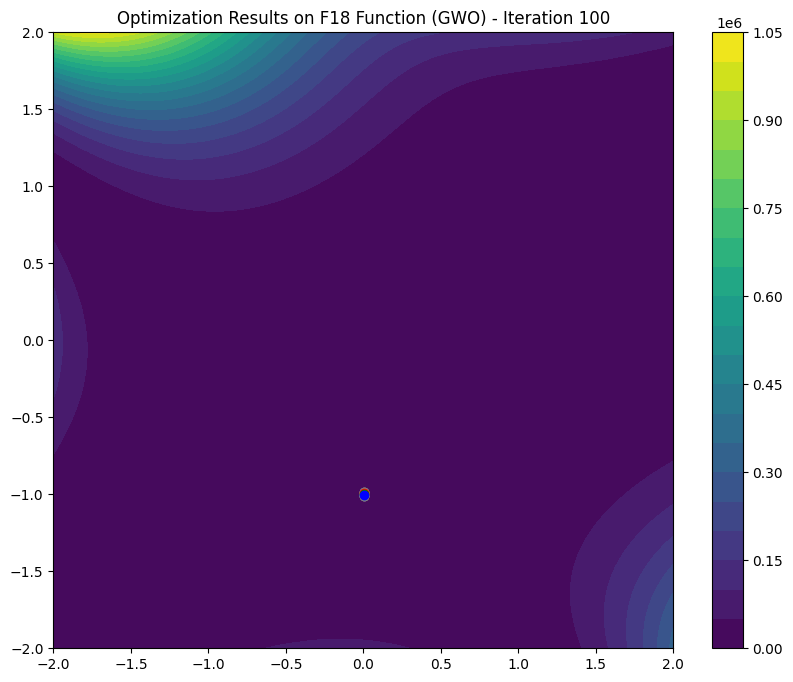

In [224]:
# Plot hasil running algoritma 1 secara interaktif

positions = initialize_wolves(search_space, num_wolves)

def gwo_animated(func, search_space, num_wolves, max_iter, filename="gwo.gif"):
    fig, ax = plt.subplots(figsize=(10, 8))
    x1_range = np.linspace(search_space[0][0], search_space[0][1], 100)
    x2_range = np.linspace(search_space[1][0], search_space[1][1], 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Z = func(X1, X2)
    contour = ax.contourf(X1, X2, Z, levels=20, cmap='viridis')
    plt.colorbar(contour)

    positions = initialize_wolves(search_space, num_wolves)
    scatter = ax.scatter(positions[:, 0], positions[:, 1], color='gray', marker='o')
    alpha_scatter = ax.scatter([], [], color='red', marker='o')
    beta_scatter = ax.scatter([], [], color='green', marker='o')
    delta_scatter = ax.scatter([], [], color='blue', marker='o')
    def update(frame):
        nonlocal positions
        fitness = calculate_fitness(func, positions)
        order = np.argsort(fitness)
        alpha_wolf = positions[order[0]]
        beta_wolf = positions[order[1]]
        delta_wolf = positions[order[2]]
        ax.set_title(f'Optimization Results on F18 Function (GWO) - Iteration {frame+1}')

        a = a_start - (a_start - a_end) * (frame / max_iter)
        positions = update_positions(positions, alpha_wolf, beta_wolf, delta_wolf, a, search_space)

        scatter.set_offsets(positions)
        alpha_scatter.set_offsets(alpha_wolf)
        beta_scatter.set_offsets(beta_wolf)
        delta_scatter.set_offsets(delta_wolf)
        return scatter, alpha_scatter, beta_scatter, delta_scatter

    animation = FuncAnimation(fig, update, frames=max_iter, interval=50, blit=True, repeat=False)
    animation.save(filename, writer=PillowWriter(fps=5))


gwo_animated(f18, search_space, num_wolves, max_iter)

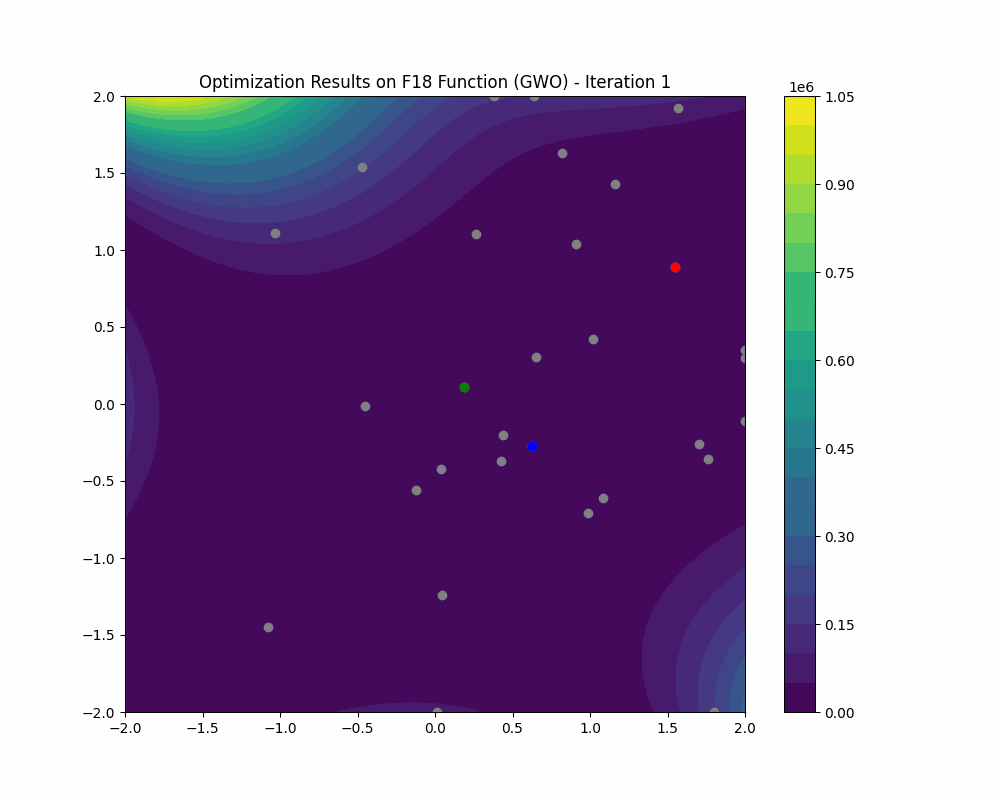

In [225]:
#Memperlihatkan animasi dari algoritma 1
Image(filename="gwo.gif")

#### Running algortima 2
Penjelasan Parameter:
*   num_ants = 30: Ini adalah jumlah semut (solusi kandidat) yang akan mencari solusi dalam setiap iterasi. Semakin banyak semut, semakin luas eksplorasi ruang pencarian, tetapi juga meningkatkan kompleksitas komputasi. Nilai 30 adalah pilihan yang umum dan seringkali memberikan keseimbangan yang baik.
*   num_iterations = 100: Ini adalah jumlah total iterasi yang akan dijalankan oleh algoritma. Semakin banyak iterasi, semakin besar peluang untuk menemukan solusi yang lebih optimal, tetapi juga membutuhkan waktu komputasi lebih lama.
*   alpha = 1.0: Parameter ini mengontrol pengaruh feromon dalam menentukan probabilitas semut memilih jalur tertentu. Nilai alpha yang lebih tinggi berarti semut lebih cenderung mengikuti jejak feromon yang sudah ada, sementara nilai yang lebih rendah mendorong eksplorasi. Nilai 1.0 adalah nilai default yang umum digunakan.
*   beta = 5.0: Parameter ini mengontrol pengaruh heuristik (informasi tambahan tentang masalah) dalam menentukan probabilitas semut memilih jalur. Nilai beta yang lebih tinggi berarti semut lebih dipengaruhi oleh heuristik, sementara nilai yang lebih rendah lebih mengandalkan feromon. Dalam kasus ini, nilai beta yang lebih tinggi (5.0) menunjukkan bahwa heuristik dianggap lebih penting daripada feromon.
*   rho = 0.5: Ini adalah tingkat penguapan feromon. Pada setiap iterasi, feromon pada setiap jalur akan berkurang sebesar faktor rho. Nilai rho yang lebih tinggi menyebabkan feromon menguap lebih cepat, mendorong eksplorasi. Nilai 0.5 adalah nilai umum yang digunakan.
*   Q = 100: Ini adalah konstanta yang digunakan untuk menentukan jumlah feromon yang disimpan pada setiap jalur. Nilai Q yang lebih tinggi akan menghasilkan jejak feromon yang lebih kuat, yang dapat mempercepat konvergensi tetapi juga meningkatkan risiko terjebak dalam optimum lokal.
*   bounds = [(-2, 2), (-2, 2)]: Ini mendefinisikan rentang nilai yang valid untuk setiap dimensi solusi. Dalam hal ini, baik x1 dan x2 dibatasi antara -2 dan 2.

In [229]:
# Run algoritma 2
 # Parameter ACO
num_ants = 30
num_iterations = 100
alpha = 1.0  
beta = 5.0   
rho = 0.5   
Q = 100      
bounds = [(-2, 2), (-2, 2)]

# Menjalankan algoritma ACO
best_solution, best_fitness, best_path, all_iterations_paths = aco(num_ants, num_iterations, alpha, beta, rho, Q, bounds)
print(f"Best Solution: {best_solution}, Best Fitness: {best_fitness}")

Iteration 1/100, Best Fitness: 3.250099993170315
Iteration 2/100, Best Fitness: 3.250099993170315
Iteration 3/100, Best Fitness: 3.250099993170315
Iteration 4/100, Best Fitness: 3.1369067168514895
Iteration 5/100, Best Fitness: 3.1369067168514895
Iteration 6/100, Best Fitness: 3.1369067168514895
Iteration 7/100, Best Fitness: 3.1369067168514895
Iteration 8/100, Best Fitness: 3.1369067168514895
Iteration 9/100, Best Fitness: 3.1369067168514895
Iteration 10/100, Best Fitness: 3.0774955813025646
Iteration 11/100, Best Fitness: 3.0774955813025646
Iteration 12/100, Best Fitness: 3.0774955813025646
Iteration 13/100, Best Fitness: 3.0774955813025646
Iteration 14/100, Best Fitness: 3.0774955813025646
Iteration 15/100, Best Fitness: 3.0774955813025646
Iteration 16/100, Best Fitness: 3.0774955813025646
Iteration 17/100, Best Fitness: 3.0774955813025646
Iteration 18/100, Best Fitness: 3.0774955813025646
Iteration 19/100, Best Fitness: 3.0774955813025646
Iteration 20/100, Best Fitness: 3.077495581

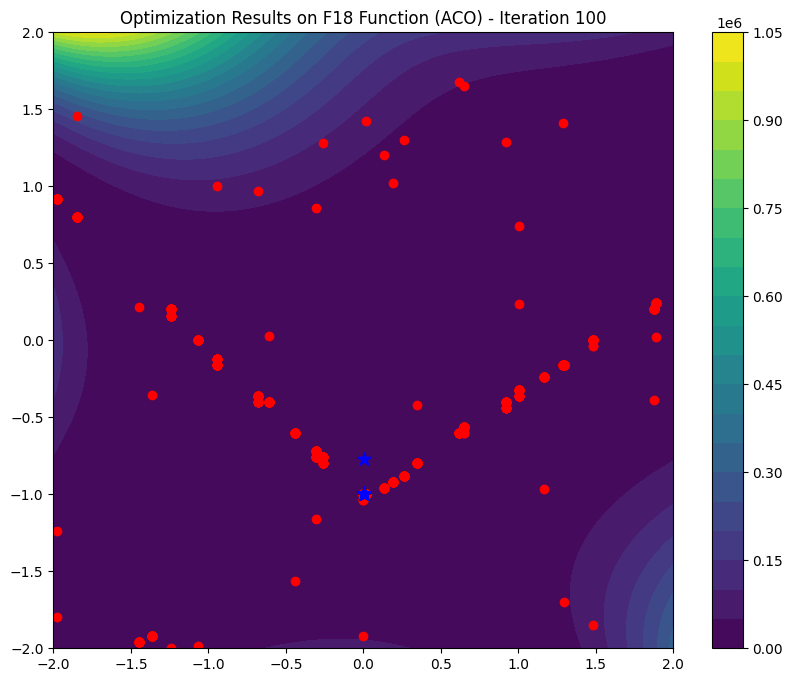

In [232]:
# Plot hasil running algoritma 2 secara interaktif

def aco_with_animation(num_ants, num_iterations, alpha, beta, rho, Q, bounds, filename="aco.gif"):
    pheromone_init = 1.0
    pheromone = np.ones((100, 100)) * pheromone_init
    best_solution = None
    best_fitness = float('inf')
    best_path = None
    all_iterations_paths = []

    # Inisialisasi plot
    fig, ax = plt.subplots(figsize=(10, 8))
    x1_range = np.linspace(bounds[0][0], bounds[0][1], 100)
    x2_range = np.linspace(bounds[1][0], bounds[1][1], 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Z = f18(X1, X2)
    contour = ax.contourf(X1, X2, Z, levels=20, cmap='viridis')
    plt.colorbar(contour)

    ant_scatters = []
    for _ in range(num_ants):
        scatter = ax.scatter([], [], c='red', marker='o')
        ant_scatters.append(scatter)

    best_scatter = ax.scatter([], [], c='blue', marker='*', s=100)

    def update(frame):
        nonlocal pheromone, best_solution, best_fitness, best_path, all_iterations_paths
        ax.set_title(f'Optimization Results on F18 Function (ACO) - Iteration {frame+1}')
        all_paths = []
        all_fitnesses = []

        for ant in range(num_ants):
            path = []
            current_position = initialize_ants(1, bounds)[0]
            path.append(current_position)

            for step in range(100):
                next_position = select_next_step(pheromone, heuristic, current_position, alpha, beta, bounds)
                path.append(next_position)
                current_position = next_position

            fitness = f18(current_position[0], current_position[1])
            all_paths.append(path)
            all_fitnesses.append(fitness)

            if fitness < best_fitness:
                best_solution = current_position
                best_fitness = fitness
                best_path = path

        update_pheromone(pheromone, all_paths, all_fitnesses, rho, Q, bounds)
        all_iterations_paths.append(all_paths)

        for i, path in enumerate(all_paths):
            ant_scatters[i].set_offsets(path)
        best_scatter.set_offsets(best_path)
        return ant_scatters + [best_scatter]

    animation = FuncAnimation(fig, update, frames=num_iterations, interval=200, blit=True, repeat=False)
    animation.save(filename, writer=PillowWriter(fps=5))
    plt.show()

aco_with_animation(num_ants, num_iterations, alpha, beta, rho, Q, bounds)

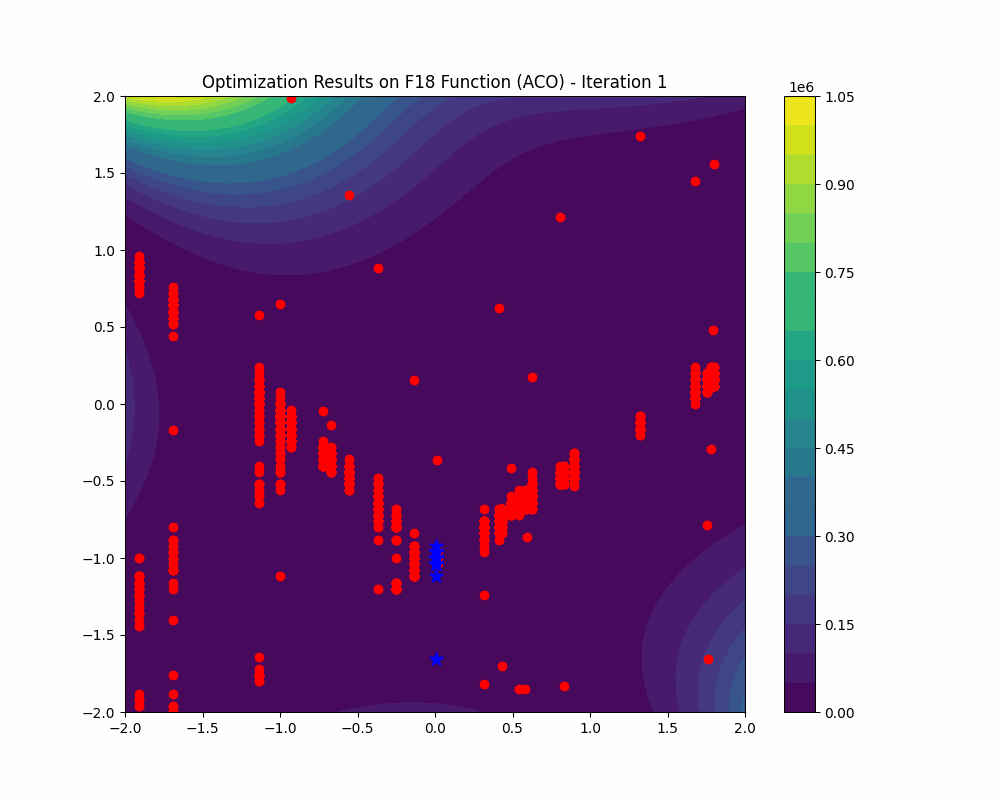

In [231]:
Image(filename="aco.gif")

#### Hasil dan Analisis

**Hasil GWO:**

Solusi Terbaik: [-0.00212269, -1.00552049]
Nilai Fitness Terbaik: 3.001816420654178

Plot visualisasi menunjukkan bahwa serigala-serigala dalam GWO cenderung berkumpul di satu titik. Ini mengindikasikan bahwa GWO berhasil menemukan solusi yang baik, yang mungkin merupakan optimum global atau lokal yang kuat. Namun, perlu diperhatikan juga kemungkinan terjadinya konvergensi prematur, di mana algoritma terjebak dalam optimum lokal sebelum menjelajahi seluruh ruang pencarian.

**Hasil ACO:**

Solusi Terbaik: [0.00238895925176541, -1.0]
Nilai Fitness Terbaik: 3.001439730168509

Plot visualisasi menunjukkan bahwa semut-semut dalam ACO menjelajahi ruang pencarian lebih luas daripada GWO, namun tetap mengarah ke beberapa titik tertentu. Ini menunjukkan bahwa ACO menemukan beberapa solusi potensial yang baik (optima lokal), atau mungkin belum sepenuhnya konvergen dan masih dalam tahap eksplorasi.

#### Kesimpulan


Berdasarkan hasil dan analisis, baik GWO maupun ACO menunjukkan performa yang sangat baik dalam mengoptimalkan fungsi f18 dengan solusi yang hampir sama baiknya. ACO sedikit lebih unggul dengan nilai fitness terbaik yang sedikit lebih rendah, namun perbedaannya tidak signifikan secara praktis. Pemilihan algoritma dapat disesuaikan dengan preferensi dan kebutuhan, dengan mempertimbangkan bahwa GWO cenderung lebih sederhana dan cepat, sedangkan ACO menawarkan potensi akurasi yang sedikit lebih tinggi dengan kompleksitas yang sedikit lebih tinggi pula.